In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

#from helpers import * 

In [114]:
df = pd.read_excel(r"C:\Users\sbotalla.DTVPAN\Desktop\Para RMC-2017.xlsx")
df.head()
df.size


301728

In [146]:
email_df = df["Contenidos"][:2000].dropna()
email_df.head()

0    PADB Allocation report\n\n\nReport Date: 01/01...
1    VC 191 (TNU) - Señal(es) fuera del aire \n\nRe...
2    Hola \n\n \n\nMe encuentro  fuera de oficina s...
3    Buenos días y feliz 2017!\n\n \n\nEn este mome...
4    VC 191 (TNU) - Señal(es) fuera del aire \n\nRe...
Name: Contenidos, dtype: object

In [158]:
stop_words_spanish = ["0","1","2","3","4","5","6","7","8","9","_","a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","erais","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estabais","estaban","estabas","estad","estada","estadas","estado","estados","estais","estamos","estan","estando","estar","estaremos","estará","estarán","estarás","estaré","estaréis","estaría","estaríais","estaríamos","estarían","estarías","estas","este","estemos","esto","estos","estoy","estuve","estuviera","estuvierais","estuvieran","estuvieras","estuvieron","estuviese","estuvieseis","estuviesen","estuvieses","estuvimos","estuviste","estuvisteis","estuviéramos","estuviésemos","estuvo","está","estábamos","estáis","están","estás","esté","estéis","estén","estés","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fuerais","fueran","fueras","fueron","fuese","fueseis","fuesen","fueses","fui","fuimos","fuiste","fuisteis","fuéramos","fuésemos","g","general","gran","grandes","gueno","h","ha","haber","habia","habida","habidas","habido","habidos","habiendo","habla","hablan","habremos","habrá","habrán","habrás","habré","habréis","habría","habríais","habríamos","habrían","habrías","habéis","había","habíais","habíamos","habían","habías","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","has","hasta","hay","haya","hayamos","hayan","hayas","hayáis","he","hecho","hemos","hicieron","hizo","horas","hoy","hube","hubiera","hubierais","hubieran","hubieras","hubieron","hubiese","hubieseis","hubiesen","hubieses","hubimos","hubiste","hubisteis","hubiéramos","hubiésemos","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","por qué","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","sal","salvo","se","sea","seamos","sean","seas","segun","segunda","segundo","según","seis","ser","sera","seremos","será","serán","serás","seré","seréis","sería","seríais","seríamos","serían","serías","seáis","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","suyos","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendremos","tendrá","tendrán","tendrás","tendré","tendréis","tendría","tendríais","tendríamos","tendrían","tendrías","tened","teneis","tenemos","tener","tenga","tengamos","tengan","tengas","tengo","tengáis","tenida","tenidas","tenido","tenidos","teniendo","tenéis","tenía","teníais","teníamos","tenían","tenías","tercera","ti","tiempo","tiene","tienen","tienes","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuve","tuviera","tuvierais","tuvieran","tuvieras","tuvieron","tuviese","tuvieseis","tuviesen","tuvieses","tuvimos","tuviste","tuvisteis","tuviéramos","tuviésemos","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","éramos","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"]
#stop_words_spanish = stop_words_spanish.append(['LISTA DE STOPWORDS A AGREGAR'])

vect = TfidfVectorizer(stop_words=stop_words_spanish, max_df=0.50, min_df=2)
X = vect.fit_transform(email_df)

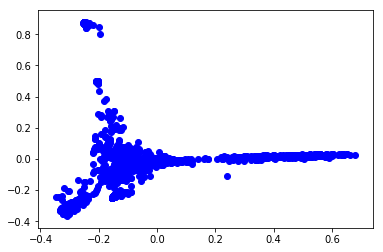

In [148]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='b')
plt.show()

In [149]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


In [150]:
features = vect.get_feature_names()
top_feats_in_doc(X, features, 1, 10)

,features,score
0,undetermined,0.395427
1,tnu,0.313833
2,191,0.294301
3,determinar,0.225365
4,determinado,0.205462
5,6711s,0.199108
6,aprox,0.171898
7,abc,0.167751
8,aire,0.162431
9,resolución,0.161091


In [155]:
def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [156]:
top_mean_feats(X, features, top_n=10)

,features,score
0,descripción,0.055210
1,directvla,0.033429
2,00,0.028293
3,señal,0.027654
4,sandra,0.022313
5,afectados,0.021936
6,affected,0.021414
7,operation,0.020786
8,technical,0.020462
9,co,0.019746


In [104]:
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

In [105]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []

    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [109]:
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

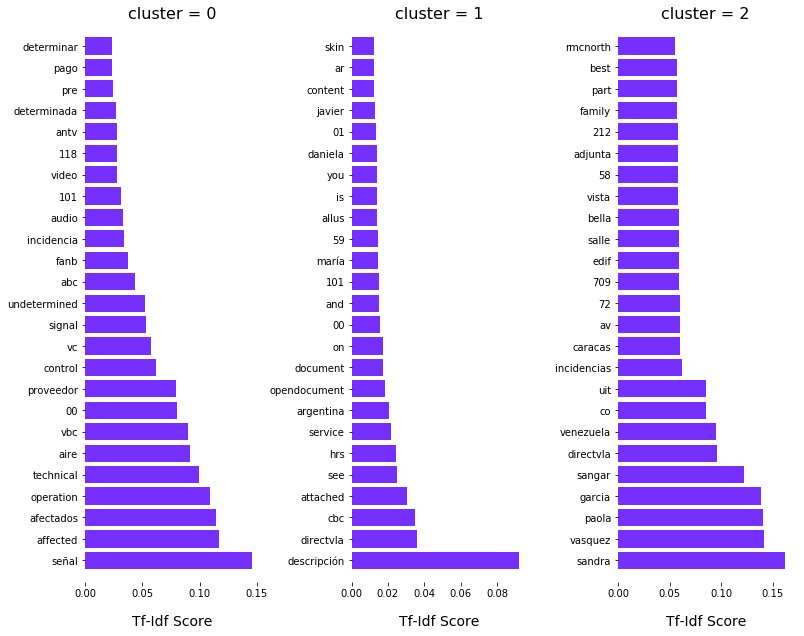

In [110]:
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))

In [138]:
print(X)

  (0, 5608)	0.010443789360534835
  (0, 1593)	0.009996913510614732
  (0, 6356)	0.015350809895249536
  (0, 2935)	0.007294442944634237
  (0, 76)	0.43060113148414736
  (0, 520)	0.0699084791218483
  (0, 100)	0.0063736033493089015
  (0, 1064)	0.29807043099168923
  (0, 3974)	0.004263714455215683
  (0, 7516)	0.022142992998369183
  (0, 7515)	0.022142992998369183
  (0, 2066)	0.022142992998369183
  (0, 2064)	0.022142992998369183
  (0, 2065)	0.022142992998369183
  (0, 2333)	0.022142992998369183
  (0, 6612)	0.022142992998369183
  (0, 2182)	0.014961388541549023
  (0, 6952)	0.022142992998369183
  (0, 5778)	0.022142992998369183
  (0, 2164)	0.022142992998369183
  (0, 6948)	0.022142992998369183
  (0, 3407)	0.022142992998369183
  (0, 6797)	0.020084899153644996
  (0, 3616)	0.022142992998369183
  (0, 6910)	0.022142992998369183
  :	:
  (2997, 5617)	0.02918760980879472
  (2997, 2829)	0.029074911564467447
  (2997, 6036)	0.07050113129117569
  (2997, 6040)	0.03570897334479729
  (2997, 7241)	0.021092477914782956

In [141]:
print(X_dense)

[[0.18702926 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.25471216 0.         0.         ... 0.         0.         0.        ]
 [0.12036849 0.         0.         ... 0.         0.         0.        ]]
